# <center> REGRESSION POLYNOMIALE


## Table des matières

* [Chapitre 1 : Régression polynomiale de différents degrés](#chapter1)
    * [1.1 : Régression polynomiale de degré 1](#section1_1)
    * [1.2 : Régression polynomiale de degré 2](#section1_2)
    * [1.3 : Régression polynomiale de degré 300](#section1_3)
* [Chapitre 2 : Courbes d'apprentissage](#chapter2)
    * [2.1 : Courbes d'apprentissage de la régression linéaire simple](#section2_1)
    * [2.2 : Courbes d'apprentissage de la régression polynomiale de degré 10](#section2_2)

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)

Générons quelques données non linéaires à l’aide d’une fonction polynomiale du second degré (en y ajoutant des aléas).

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [3]:
np.shape(X), np.shape(y)
# array([[x],
#        [y],
#        [z]])

((100, 1), (100, 1))

Text(0.5, 1.0, "Représentation graphique des données d'entraînement")

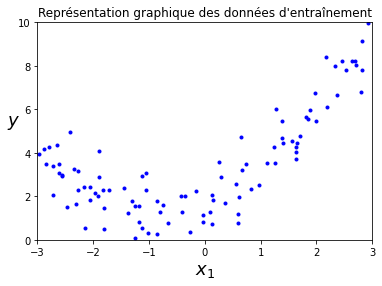

In [4]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("Représentation graphique des données d'entraînement")

---
## <center> Chapitre 1 : Régressions polynomiales de différents degrés <a class="anchor" id="chapter1"></a>
---

### 1.1 Régression polynomaile de degré 1 <a class="anchor" id="section1_1"></a>

(-3.0, 3.0, 0.0, 10.0)

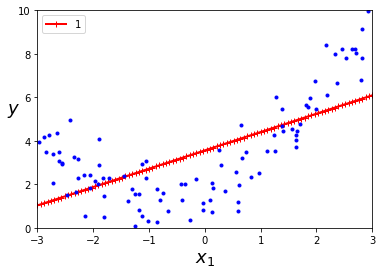

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline


polybig_features = PolynomialFeatures(degree=1, include_bias=False)
std_scaler = StandardScaler()
try:
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
except:
    lin_reg = LinearRegression(normalize=True)
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)

x = np.linspace(-3, 3, 100) # np.shape(x) (100,1) array([x, y, ..., z])    
x = x.reshape(100, 1) # np.shape(x) (100,1) array([[x], [y], ..., [z]])
y_newbig = polynomial_regression.predict(x)
plt.plot(x, y_newbig, "r-+", label=str(1), linewidth=2)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

### 1.1 Régression polynomaile de degré 2 <a class="anchor" id="section1_2"></a>

Il est clair qu’une ligne droite n’ajustera jamais correctement ces données. Utilisons donc la classe `PolynomialFeatures` de Scikit-Learn pour transformer nos données d’apprentissage, en ajoutant les carrés (polynômes du second degré) des variables aux variables existantes (dans notre cas, il n’y avait qu’une variable).

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

`X_poly` contient désormais la variable originelle de `X` plus le carré de celle-ci. 

In [7]:
np.shape(X_poly)
# array([[x1, x2],
#        [y1, y2],
#        [z1, z2]])

(100, 2)

In [8]:
X[0]

array([-0.75275929])

In [9]:
X_poly[0]

array([-0.75275929,  0.56664654])

Nous pouvons alors ajuster un modèle `LinearRegression` à notre jeu d’entraînement complété.

In [10]:
from sklearn.linear_model import LinearRegression 
try:
    lin_reg = LinearRegression() 
    lin_reg.fit(X_poly, y)
except:
    lin_reg = LinearRegression(normalize=True)
    lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

On a $$\hat{\boldsymbol{\theta}}=
\begin{pmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \end{pmatrix} =
\begin{pmatrix} \texttt{lin}\_\texttt{reg.intercept}\_ \\ \texttt{lin}\_\texttt{reg.coef}\_\texttt{[0]} \\ \texttt{lin}\_\texttt{reg.coef}\_\texttt{[1]} \end{pmatrix}$$

Le modèle linéaire est donc 
$$\hat{y}=\theta_0 + \theta_1 x + \theta_2x^2= \texttt{lin}\_\texttt{reg.intercept}\_ + \texttt{lin}\_\texttt{reg.coef}\_\texttt{[0]}x_1 + \texttt{lin}\_\texttt{reg.coef}\_\texttt{[1]}x_1^2$$
ou encore
$$\hat{y}=\hat{\boldsymbol{\theta}} \cdot x= {}^t\hat{\boldsymbol{\theta}} x $$

Ce n’est pas mal ! Le modèle donne l’estimation 
$$\hat{y}  = 0,56 x_1^2 + 0,93 x_1 + 1,78$$

alors que la fonction d’origine était $y = 0,5 x_1^2 + 1,0 x_1 + 2,0 + \text{aléa gaussien}$.

Text(0.5, 1.0, 'Représentation graphique du modèle')

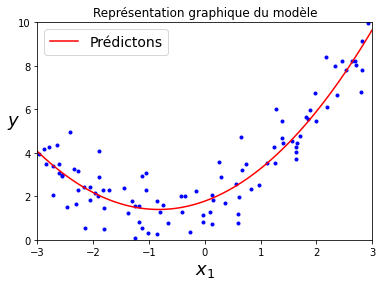

In [11]:
plt.plot(X, y, 'b.')
x = np.linspace(-3, 3, 100) # np.shape(x) (100,1) array([x, y, ... z])
x = x.reshape(100, 1) # np.shape(x) (100,1) array([[x], [y], ..., [z]])
x_poly = poly_features.transform(x) # np.shape(x_poly) (100,2) 
y_predict = lin_reg.predict(x_poly) # np.shape(y) (100,1)
plt.plot(x, y_predict, "r-", label="Prédictons")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.legend(loc="upper left", fontsize=14)
plt.title('Représentation graphique du modèle')

### 1.3 Régression polynomaile de degré 300 <a class="anchor" id="section1_3"></a>

La figure 4.14 applique par exemple un modèle polynomial de degré 300 aux données d’entraînement précédentes, puis compare le résultat à un modèle purement linéaire et à un modèle quadratique (polynôme du second degré). Notez comme le modèle polynomial de degré 300 ondule pour s’approcher autant que possible des observations d’entraînement.

(-3.0, 3.0, 0.0, 10.0)

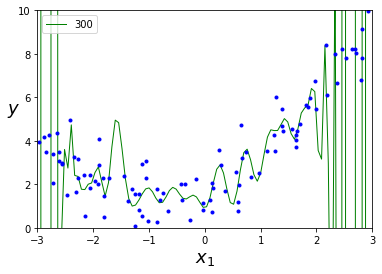

In [12]:
polybig_features = PolynomialFeatures(degree=300, include_bias=False)
std_scaler = StandardScaler()
try:
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
except:
    lin_reg = LinearRegression(normalize=True)
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    
y_newbig = polynomial_regression.predict(x)
plt.plot(x, y_newbig, "g-", label=str(300), linewidth=1)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

Ce modèle polynomial de haut degré surajuste considérablement les données d’entraînement, alors que le modèle linéaire les sous-ajuste. Le modèle qui se géné-ralisera le mieux dans ce cas est le modèle du second degré. C’est logique, vu que les données ont été générées à l’aide d’un polynôme du second degré.

---
## <center> Chapitre 2 : Courbes d'apprentissage <a class="anchor" id="chapter2"></a>
---

Le code suivant définit une fonction qui trace les courbes d’apprentissage d’un modèle pour un jeu d’entraînement donné :

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m]) # m premières lignes
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

### 1.1 Courbes d'apprentissage du modèle de régression linéaire simple <a class="anchor" id="section2_1"></a>

(0.0, 80.0, 0.0, 3.0)

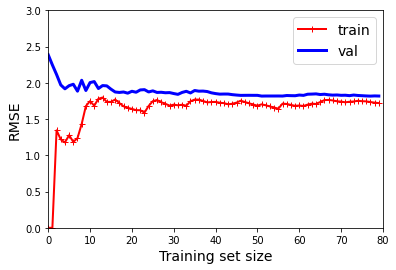

In [14]:
try:
    lin_reg = LinearRegression() 
    plot_learning_curves(lin_reg, X, y)
except:
    lin_reg = LinearRegression(normalize=True)
    plot_learning_curves(lin_reg, X, y)
    
plt.axis([0, 80, 0, 3])                         # not shown in the book

Ce modèle qui sous-ajuste mérite quelques explications. 
- Voyons d’abord les performances sur le jeu d’entraînement : lorsque celui-ci ne comporte qu’une ou deux observations, le modèle peut les ajuster parfaitement, c’est pourquoi la courbe commence à zéro. Mais à mesure qu’on ajoute de nouvelles observations au jeu d’entraînement, le modèle a de plus en plus de mal à les ajuster, d’une part à cause du bruit, et d’autre part parce que ce n’est pas linéaire du tout. C’est pourquoi l’erreur sur le jeu d’entraînement augmente jusqu’à atteindre un plateau : à partir de là, l’ajout de nouvelles observations au jeu d’entraînement ne modifie plus beaucoup l’erreur moyenne, ni en bien ni en mal. 
- Voyons maintenant les performances du modèle sur les données de validation : lorsque le modèle est entraîné à partir de très peu d’observations, il est incapable de généraliser correctement, c’est pourquoi l’erreur de validation est relativement importante au départ. Puis le modèle s’améliore à mesure qu’il reçoit davantage d’exemples d’entraînement, c’est pourquoi l’erreur de validation diminue lentement. Cependant, il n’est toujours pas possible de modéliser correctement les données à l’aide d’une ligne droite, c’est pourquoi l’erreur finit en plateau, très proche de l’autre courbe. 

Ces courbes d’apprentissage sont caractéristiques d’un modèle qui sous-ajuste : les deux courbes atteignent un plateau, elles sont proches et relativement hautes.

### 1.2 Courbes d'apprentissage du modèle polynomiale de degré 10 <a class="anchor" id="section2_2"></a>

Voyons maintenant les courbes d’apprentissage d’un modèle polynomial de degré 10 sur les mêmes données :

(0.0, 80.0, 0.0, 3.0)

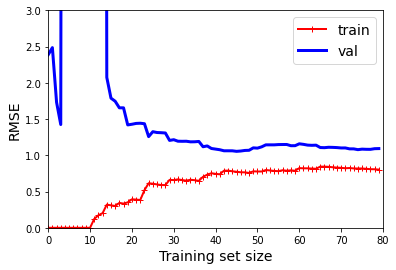

In [15]:
from sklearn.pipeline import Pipeline

try:
    polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])
    plot_learning_curves(polynomial_regression, X, y)
except:
    polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression(normalize=True)),
    ])
    plot_learning_curves(polynomial_regression, X, y)
    
plt.axis([0, 80, 0, 3])           # not shown

Ces courbes d’apprentissage ressemblent un peu aux précédentes, mais il y a deux différences très importantes :
- 1.  L’erreur sur les données d’entraînement est très inférieure à celle du modèle de régression linéaire.
- 2.  Il y a un écart entre les courbes. Cela signifie que le modèle donne des résultats nettement meilleurs sur le jeu d’entraînement que sur le jeu de validation, ce qui est la marque d’un modèle qui surajuste. Cependant, si vous augmentez le nombre d’observations de votre jeu d’entraînement, les deux courbes se rapprocheront.